In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import re
from collections import Counter
from tweepy import OAuthHandler
import json
import pycountry
import os
from dotenv import load_dotenv
import time
import csv
from IPython.display import Image
from sklearn.feature_extraction.text import TfidfVectorizer

### Este jupyternotebook es para iniciar  la extraccion de datos y poder iniciar todo el proceso.

In [12]:
load_dotenv()


CONSUMER_KEY = os.getenv("consumer_key")
CONSUMER_SECRET = os.getenv("consumer_secret")
ACCESS_TOKEN = os.getenv("access_token")
ACCESS_SECRET = os.getenv("access_token_secret")

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

user=api.me()
print(user.name,",", user.screen_name)

卡西亚 , nadie_me_tiene


In [3]:
#("Preparandome para el trabajo final de IronHack")
#https://twitter.com/nadie_me_tiene/status/1313883047469686790

In [4]:
'''start_time = time.time()

max_id = -300000
tweetsPerQry = 1000  
search_words = '(@JoeBiden OR @DonaldTrump OR Donald Trump OR Joe Biden)'
date_since = "2020-09-29" 

# append data
csvFile = open(search_words + '_data4.csv', 'w', encoding='utf-8')

#csv Writer
csvWriter = csv.writer(csvFile)

#get data
tweet_num = 0
for tweet in tweepy.Cursor(
                        api.search,
                        q=search_words + ' -RT',
                        count=tweetsPerQry,
                        lang="en", 
                        since=date_since, max_id=str(max_id - 1)).items(9999999999):
    if tweet.place is not None:
        try:
            print ('tweet number: {}'.format(tweet_num), tweet.text, tweet.place.full_name)
            # write data
            csvWriter.writerow([tweet.created_at,
                                tweet.user.screen_name,
                                tweet.user.location,
                                tweet.user.followers_count,
                                tweet.user.friends_count,
                                tweet.text,
                                tweet.place.bounding_box.coordinates,
                                tweet.place.full_name,
                                tweet.place.country,
                                tweet.place.country_code,
                                tweet.place.place_type])
            tweet_num += 1
            
        except :
            continue

print("--- %s seconds ---" % (time.time() - start_time))
'''

'start_time = time.time()\n\nmax_id = -300000\ntweetsPerQry = 1000  \nsearch_words = \'(@JoeBiden OR @DonaldTrump OR Donald Trump OR Joe Biden)\'\ndate_since = "2020-09-29" \n\n# append data\ncsvFile = open(search_words + \'_data4.csv\', \'w\', encoding=\'utf-8\')\n\n#csv Writer\ncsvWriter = csv.writer(csvFile)\n\n#get data\ntweet_num = 0\nfor tweet in tweepy.Cursor(\n                        api.search,\n                        q=search_words + \' -RT\',\n                        count=tweetsPerQry,\n                        lang="en", \n                        since=date_since, max_id=str(max_id - 1)).items(9999999999):\n    if tweet.place is not None:\n        try:\n            print (\'tweet number: {}\'.format(tweet_num), tweet.text, tweet.place.full_name)\n            # write data\n            csvWriter.writerow([tweet.created_at,\n                                tweet.user.screen_name,\n                                tweet.user.location,\n                                tweet.user

In [31]:
#Defino las columnas que voy a utilizar y paso la informacion a un CSV
col_names=['date','user_name','user_loc','followers','friends','message','bbox_coords',\
           'full_name','country','country_code','place_type']
df2= pd.read_csv('(@JoeBiden OR @DonaldTrump OR Donald Trump OR Joe Biden)_data3.csv', names=col_names)
df2.shape
#Tras un exitoso web scrapping consigo rascar 2300 tweets

(2505, 11)

In [14]:
df2.isna().sum()

date              0
user_name         0
user_loc        520
followers         0
friends           0
message           1
bbox_coords       1
full_name         1
country           8
country_code      8
place_type        1
dtype: int64

In [15]:
df2['user_loc']=df2['user_loc'].fillna(df2['country'])
#Rellenamos los valores desconocidos con los de la columna pais, puesto que tienen informacion reemplazable
print(df2.isna().sum())
df2=df2.fillna('UNKNOWN')
print(df2.isna().sum())
#Sustituimos los valores donde careciamos la informacion sobre su paradero con UNKNOWN, eran seis personas y ya
#poseemos un dataset sin valores vacios.

date            0
user_name       0
user_loc        2
followers       0
friends         0
message         1
bbox_coords     1
full_name       1
country         8
country_code    8
place_type      1
dtype: int64
date            0
user_name       0
user_loc        0
followers       0
friends         0
message         0
bbox_coords     0
full_name       0
country         0
country_code    0
place_type      0
dtype: int64


In [16]:
df2.country_code.value_counts()

US         2211
GB           73
CA           55
AU           20
IN           15
MX           14
IE           11
NG            8
UNKNOWN       8
KE            6
ID            6
BR            4
DE            4
NL            4
IT            3
ZA            3
CN            2
BE            2
JP            2
CL            2
IQ            2
VN            2
IL            2
SE            2
HK            2
UG            2
NO            2
TH            2
VE            2
AR            2
AE            2
ES            2
NZ            2
SG            2
RU            1
BD            1
AW            1
BW            1
NE            1
PT            1
TZ            1
PH            1
GN            1
GR            1
BS            1
NP            1
CY            1
FR            1
KY            1
JM            1
CO            1
PL            1
GT            1
HT            1
RO            1
PE            1
CR            1
PA            1
Name: country_code, dtype: int64

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          2505 non-null   object
 1   user_name     2505 non-null   object
 2   user_loc      2505 non-null   object
 3   followers     2505 non-null   object
 4   friends       2505 non-null   object
 5   message       2505 non-null   object
 6   bbox_coords   2505 non-null   object
 7   full_name     2505 non-null   object
 8   country       2505 non-null   object
 9   country_code  2505 non-null   object
 10  place_type    2505 non-null   object
dtypes: object(11)
memory usage: 215.4+ KB


In [45]:
df2=df2.set_index('date')
df2=df2.drop('nds', axis=0)
#Elimino una fila con valores perdidos

KeyError: "None of ['date'] are in the columns"

In [49]:
df2=df2.reset_index()
df2

,index,date,user_name,user_loc,followers,friends,message,bbox_coords,full_name,country,country_code,place_type
0,0,2020-10-10 11:41:36,susanha77835097,"Florida, USA",2,34,@blossomingabyss @JoeBiden He filled his pocke...,"[[[-80.131529, 25.900463], [-80.118613, 25.900...","Sunny Isles Beach, FL",United States,US,city
1,1,2020-10-10 11:19:05,tomborelli,"Greenwich, CT",32169,1596,Supporting @JoeBiden means packing the Supreme...,"[[[-73.710304, 41.00137], [-73.568516, 41.0013...","Greenwich, CT",United States,US,city
2,2,2020-10-10 09:39:10,John_Di_Lemme,(561) 847-3467,9455,741,@ABC13News @realDonaldTrump @JoeBiden Nancy Pe...,"[[[-80.2006, 26.644671], [-80.044639, 26.64467...","West Palm Beach, FL",United States,US,city
3,3,2020-10-10 08:39:14,Parnell_100,NaN,1753,2771,@JoeBiden There is NO STOPPING this AMERICAN T...,"[[[-6.0361161, 54.543241], [-5.8207101, 54.543...","Belfast, Northern Ireland",United Kingdom,GB,city
4,4,2020-10-10 07:18:33,sqlblues,"Weston-super-Mare, England",1179,1052,@FenrirWolf26 @Stanhope2011VJ Britons have als...,"[[[-2.994831, 51.31404], [-2.8954284, 51.31404...","Weston-super-Mare, England",United Kingdom,GB,city
...,...,...,...,...,...,...,...,...,...,...,...,...
2499,2499,2020-10-01 14:17:27,JojoAkoto,Louvain-La-Neuve,770,5004,Great debate between Donald Trump and Joe Bide...,"[[[4.4918239, 50.6490413], [4.6483576, 50.6490...","Ottignies-Louvain-la-Neuve, Belgique",Belgium,BE,city
2500,2500,2020-10-01 14:17:12,Crackerthe4th,"Chicago, Illinois",15731,14924,To all the undecided voters: the biggest sprea...,"[[[-87.940033, 41.644102], [-87.523993, 41.644...","Chicago, IL",United States,US,city
2501,2501,2020-10-01 14:13:16,ThomasCagganel1,"Monroe, CT",508,104,@thebradfordfile Chris Wallace went after Dona...,"[[[-73.30176, 41.2941016], [-73.170665, 41.294...","Monroe, CT",United States,US,city
2502,2502,2020-10-01 14:12:24,Hal4,"Washington, DC",2232,5001,https://t.co/faYZgsey1P Something #good for a ...,"[[[-77.119401, 38.801826], [-76.909396, 38.801...","Washington, DC",United States,US,city


In [48]:
df2['date']=pd.to_datetime(df2['date'])
print(df2.date.min())
print(df2.date.max())


2020-10-01 14:08:29
2020-10-10 11:41:36


In [50]:
print(df2.user_name.value_counts())


lroerig1255        92
Walker1world       59
RussOnPolitics     19
AKkevi7            17
CuttemUp           16
                   ..
spielberg_indy      1
HASSBEAT            1
TIGER85158183       1
UnlessPA            1
DirtyJerseyMatt     1
Name: user_name, Length: 1758, dtype: int64


In [51]:
print(df2.shape)
df2.message.drop_duplicates(inplace= True)
print(df2.shape)
print(df2.message.value_counts().head)

(2504, 12)
(2504, 12)
<bound method NDFrame.head of Donald Trump is losing by 16 in a new CNN poll. And that's not the worst news.\n#2020Election #Election2020… https://t.co/xpMPwi7dox                1
@brad_dickson Not. Now more than ever @JoeBiden need to continue to campaign. Joe Biden has campaigned safely and c… https://t.co/iMfA7vf2py        1
🇦🇺🇦🇺 Jim Carrey makes his debut as Joe Biden in the SNL premiere  https://t.co/tPX0BFhIh8 #Election2020… https://t.co/vJusLfyzxg                    1
@JoeBiden This is why Senator Lindsey Graham call Joe Biden the most decent man in Politics. As Lindsey says, “if y… https://t.co/MnoRgAQ8r6        1
@JoeBiden Doesn’t Biden know that people are still getting COVID-19 even with a 😷 mask. You talk about people getti… https://t.co/iQmIFkQt3W        1
                                                                                                                                                   ..
@JoeBiden @Krystyn77733531 You’re so right Joe B

In [52]:
def geo_mean(x):
    y = json.loads(x)
    y = np.asarray(y)
    mean_geoloc = np.add(np.add((y[:][0][0]),(y[:][0][1]))/2,\
                         (np.add((y[:][0][2]),(y[:][0][3]))/2))/2    
    return np.around(mean_geoloc,decimals=6)
#Uso una funcion para transformar las bounding box(cuadros delimitadores) en coordenadas geograficas (llevar a funcpy)

In [53]:
df2['geo_code'] = df2['bbox_coords'].apply(geo_mean)
df2.drop(['bbox_coords','place_type','followers','friends'],axis=1, inplace= True)
df2.head()
#Aplico la funcion a la columna, elimino columnas redundantes como el tipo de lugar desde donse tuitea, el numero de seguidores o el numero de amiwis que tienen
#

,index,date,user_name,user_loc,message,full_name,country,country_code,geo_code
0,0,2020-10-10 11:41:36,susanha77835097,"Florida, USA",@blossomingabyss @JoeBiden He filled his pocke...,"Sunny Isles Beach, FL",United States,US,"[-80.125071, 25.92906]"
1,1,2020-10-10 11:19:05,tomborelli,"Greenwich, CT",Supporting @JoeBiden means packing the Supreme...,"Greenwich, CT",United States,US,"[-73.63941, 41.050217]"
2,2,2020-10-10 09:39:10,John_Di_Lemme,(561) 847-3467,@ABC13News @realDonaldTrump @JoeBiden Nancy Pe...,"West Palm Beach, FL",United States,US,"[-80.12262, 26.721896]"
3,3,2020-10-10 08:39:14,Parnell_100,NaN,@JoeBiden There is NO STOPPING this AMERICAN T...,"Belfast, Northern Ireland",United Kingdom,GB,"[-5.928413, 54.595869]"
4,4,2020-10-10 07:18:33,sqlblues,"Weston-super-Mare, England",@FenrirWolf26 @Stanhope2011VJ Britons have als...,"Weston-super-Mare, England",United Kingdom,GB,"[-2.94513, 51.346796]"


In [54]:
#df2.to_csv('./Outputs/datasetito.csv')
#Esto deberia ser el paso final de este notebook

In [ ]:
#test= pd.read_csv('./Outputs/datasetito.csv')

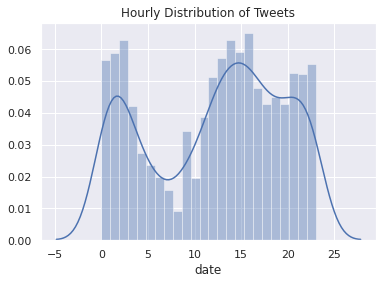

In [55]:
sns.set()# Ploteo el historigrama dividido en 24 horas para ver cuando se twittea
sns.distplot(df2["date"].dt.hour, bins=24)
plt.title("Hourly Distribution of Tweets")
plt.show()

#### Observamos que la distribucion de los tweets se da de 00:00 a 03:00 y de 12:00 a 17:00, las horas mas activas son los extremos de este intervalo.

In [ ]:
top_countries = df2["country"].value_counts(sort=True).head(10)
top_countries

In [ ]:
countries = df2[df2.country!='unknown']

# Select the top 10 countries
top_countries = df2["country"].value_counts(sort=True).head(10)

#TOCA RETOCARLA PORQUE NO SALE CORRECTAMENTE
plt.figure(figsize=(15,10))
sns.barplot(x=df2.country.value_counts(),y=top_countries)
plt.xlabel("Countries")
plt.ylabel("Tweet count")
plt.title("Top 10 Countries")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df2["longitud"] = df2["message"].str.len()
df2["palabras"] = df2["message"].str.split().str.len()
display(df2[['longitud','palabras']])

In [ ]:
import nltk


# Import word_tokenize and stopwords from nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def process_tweets(tweet):
    
    # Remove links
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    # Remove mentions and hashtag
    tweet = re.sub(r'\@\w+|\#','', tweet)
    
    # Tokenize the words
    tokenized = word_tokenize(tweet)

    # Remove the stop words
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token, pos='a') for token in tokenized]

    # Remove non-alphabetic characters and keep the words contains three or more letters
    tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]
    # Fit and transform the vectorizer
    return tokenized
    
# Call the function and store the result into a new column
df2["refinado"] = df2["message"].apply(process_tweets)

# Print the first fifteen rows of Processed
display(df2[["refinado"]].head(15))

### Tf-idf (Term Frequency — Inverse Term Frequency)
![alt text](https://miro.medium.com/max/505/0*oacXK7VlaV2Usteq.png)

In [ ]:
tfidfstops=stopwords.words('english')
vectorizer = TfidfVectorizer(max_features=5000, stop_words= tfidfstops)
# Fit and transform the vectorizer
tfidf_matrix = vectorizer.fit_transform(df2.refinado)
# Let's see what we have
display(tfidf_matrix)# Create a DataFrame for tf-idf vectors and display the first rows
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns= vectorizer.get_feature_names())
display(tfidf_df.head())